# Importing all necessary libraries which we are used here

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.svm import SVR

In [3]:
# Import Our Dataset from excel file to Pandas Dataframe
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
# Checking For any null values present in dataset
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
df.shape

(414, 9)

In [8]:
# Checking relation between features and target Value
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [12]:
relation=df.corr()

<AxesSubplot:>

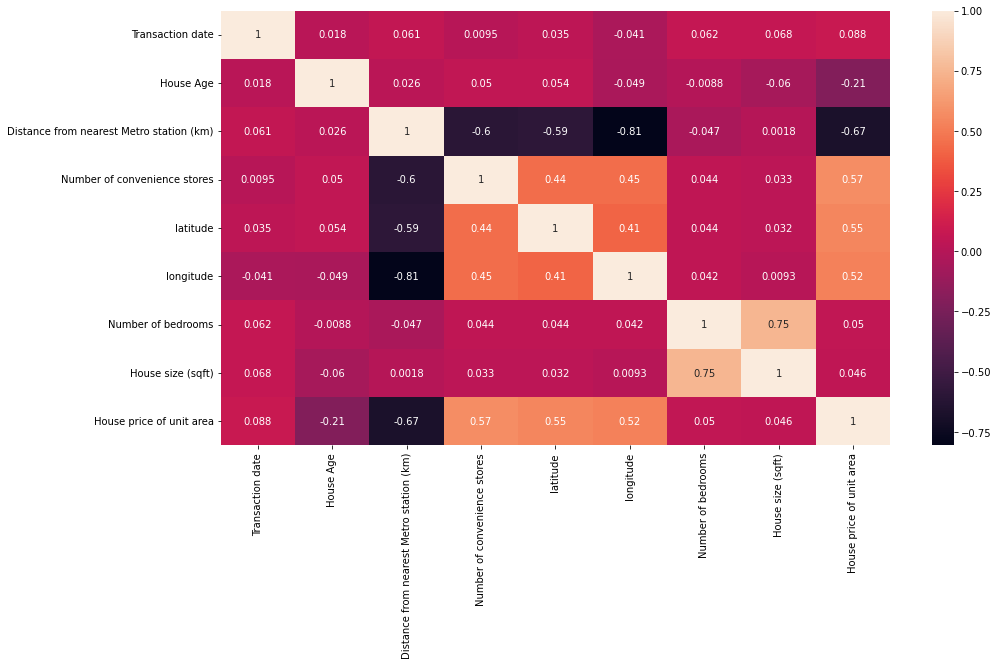

In [13]:
# lets make it more understanble and easy to understand
# Negative sign shows features are inversely propotional
# Postive sign shows directy propotional
plt.figure(figsize=(15, 8))
sns.heatmap(relation,annot=True)

In [14]:
# we can see some features doesnot effect price too much like 'Number of bedrooms','House size (sqft)','Transaction date' so we can drop them
# But in real number of bedrooms and house size effect price exponentially 
df.drop(['Number of bedrooms','House size (sqft)','Transaction date'],inplace=True,axis=1)

In [15]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


# Now we Start to split over data

In [16]:
X=df.iloc[:,0:5]
y=df['House price of unit area']

In [17]:
X

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [18]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

In [20]:
# here we break our dataset in two sets trainning (70%) and test (30%)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Now we Start to apply differnet ML models

In [22]:
# Now we use a linear regression model 
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))

RMSE 8.624661142933238


In [24]:
# Now we use a lasso regression model
ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))



RMSE 9.125189831313019


In [26]:
# Now we Use SVM 
svr = SVR(kernel = 'rbf')
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))


RMSE 8.934894997160896


In [27]:
# Now we use XGbosst regressor
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)
pred=xg.predict(x_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))

f:\dl1\venv\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


RMSE 7.522139530229641


In [28]:
# Now we use Randomforest which is an ensembling technique
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)
pred=rfg.predict(x_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))

RMSE 6.338156997362457


# uptill now random forest performe better than other model so we try to apply hyperparameter tunning

In [31]:
split=[2,3,4,5,6]
estimators=[110,120,130,140,150]

In [32]:
rmse=[]
for i in split:
    for j in estimators:
        rf=RandomForestRegressor(n_estimators=j,min_samples_split=i)
        rf.fit(x_train,y_train)
        pred=rf.predict(x_test)
        diff=np.sqrt(mean_squared_error(y_test,pred))
        rmse.append(diff)

print(rmse)

[6.490940849936054, 6.407908140219701, 6.438911723768708, 6.353779222082724, 6.413352604212514, 6.483003067162733, 6.335191270308297, 6.508898772682094, 6.298454397770069, 6.353085614617849, 6.351374144617217, 6.443890434330114, 6.433669601977412, 6.4599662147121775, 6.3265214470052085, 6.5039588215778705, 6.396289601448271, 6.489256021693511, 6.4869460583293215, 6.472637365273384, 6.454700516182935, 6.547729228151597, 6.439756792584729, 6.478670081646086, 6.467775269399217]


In [33]:
# so here we see with 150 estimators and 4 min_samples_split over model accuracy incrreases


# Conclusion

# 1 : We see the relation between features which are highly positivley correlated and negativley correleated
# 2: We drop columns which are less important in this dataset
# 3: Apply different-differnt models like linear regression , lasso, svm, xgboost and randomforest
# 4 : we consider random forest over others on the basis of root mean squarred error which is the best metrice for regression problems
# 5: Then apply some tunning to increase performance of model